In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("D:/Data/cetpa_ml/loan detection.xlsx",sheet_name="Sheet1")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
gender=pd.get_dummies(data["Gender"],drop_first=True)
gender.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [4]:
marr=pd.get_dummies(data["Married"],drop_first=True)
marr.head()

,Yes
0,0
1,1
2,1
3,1
4,0


In [5]:
Edu=pd.get_dummies(data["Education"],drop_first=True)
Edu.head()

,Not Graduate
0,0
1,0
2,0
3,1
4,0


In [6]:
se=pd.get_dummies(data["Self_Employed"])
se.pop("Yes")
se.head()

,No
0,1
1,1
2,0
3,1
4,1


In [7]:
prop=pd.get_dummies(data["Property_Area"],drop_first=True)
prop.head()

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [8]:
LoanStatus=pd.get_dummies(data["Loan_Status"],drop_first=True)
LoanStatus.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [9]:
data=data.drop(["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         592 non-null    float64
 5   Loan_Amount_Term   600 non-null    float64
 6   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 33.7+ KB


In [10]:
data=pd.concat((data,gender,marr,se,Edu,prop,LoanStatus),axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         592 non-null    float64
 5   Loan_Amount_Term   600 non-null    float64
 6   Credit_History     564 non-null    float64
 7   Male               614 non-null    uint8  
 8   Yes                614 non-null    uint8  
 9   No                 614 non-null    uint8  
 10  Not Graduate       614 non-null    uint8  
 11  Semiurban          614 non-null    uint8  
 12  Urban              614 non-null    uint8  
 13  Y                  614 non-null    uint8  
dtypes: float64(4), int64(1), object(2), uint8(7)
memory usage: 37.9+ KB


In [11]:
data.pop("Dependents")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         592 non-null    float64
 4   Loan_Amount_Term   600 non-null    float64
 5   Credit_History     564 non-null    float64
 6   Male               614 non-null    uint8  
 7   Yes                614 non-null    uint8  
 8   No                 614 non-null    uint8  
 9   Not Graduate       614 non-null    uint8  
 10  Semiurban          614 non-null    uint8  
 11  Urban              614 non-null    uint8  
 12  Y                  614 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(7)
memory usage: 33.1+ KB


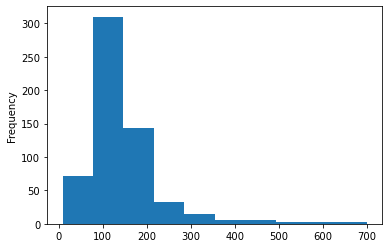

In [12]:
data["LoanAmount"].plot.hist()
data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

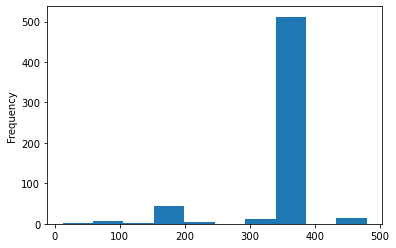

In [13]:
data["Loan_Amount_Term"].plot.hist()
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median(),inplace=True)

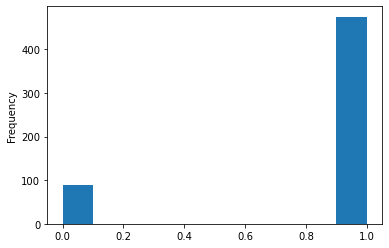

In [14]:
data["Credit_History"].plot.hist()
data["Credit_History"].fillna(data["Credit_History"].median(),inplace=True)

In [15]:
data.isnull().sum()

Loan_ID              0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Male                 0
Yes                  0
No                   0
Not Graduate         0
Semiurban            0
Urban                0
Y                    0
dtype: int64

In [16]:
data.pop("Loan_ID")

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [17]:
y=data["Y"]
x=data.drop(["Y"],axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
###Naive bayes
from sklearn.naive_bayes import GaussianNB

In [24]:
#creat a model
classifier=GaussianNB()

In [25]:
#fitting training data to the model
classifier.fit(x_train,y_train)

GaussianNB()

In [26]:
Y_pred=classifier.predict(x_test)
print(list(zip(y_test,Y_pred)))

[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (1, 0), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 1), (1, 1),

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix=confusion_matrix(y_test,Y_pred)
print(confusion_matrix)

[[ 29  36]
 [  6 114]]


In [28]:
accuracy_score=accuracy_score(y_test,Y_pred)
print("Accuracy of the model:",accuracy_score)

Accuracy of the model: 0.772972972972973
